1

enter xleft -5
enter xright 5
enter step 0.01
enter calculation time 2
разрыв 2.0674311926605506
left area:  0.01781174905290662 right area:  0.01174790708074331


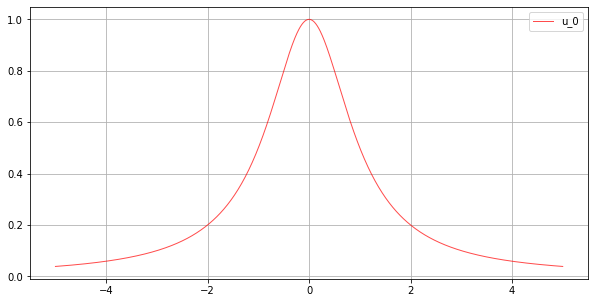

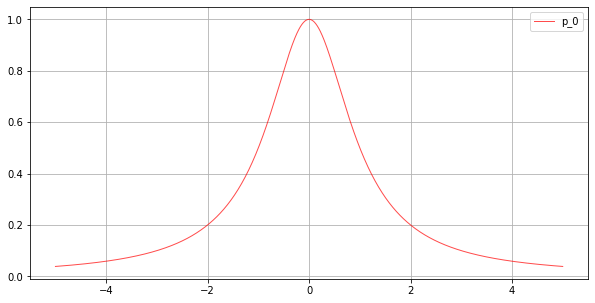

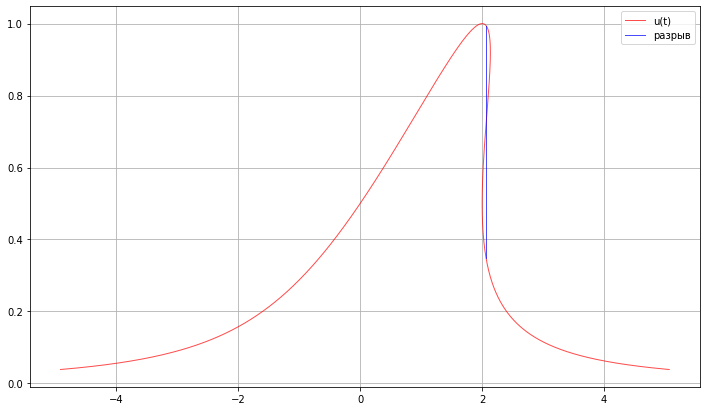

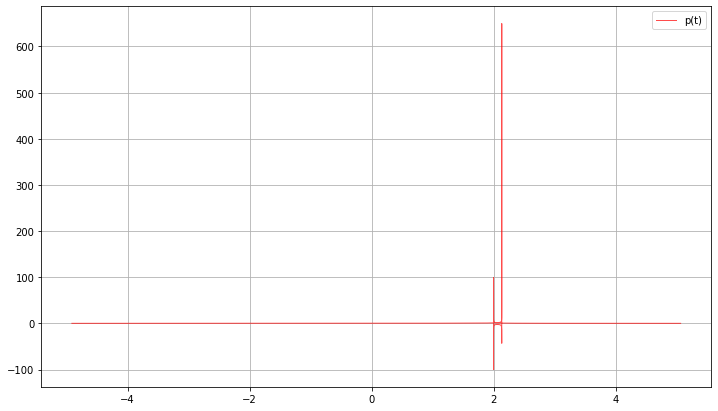

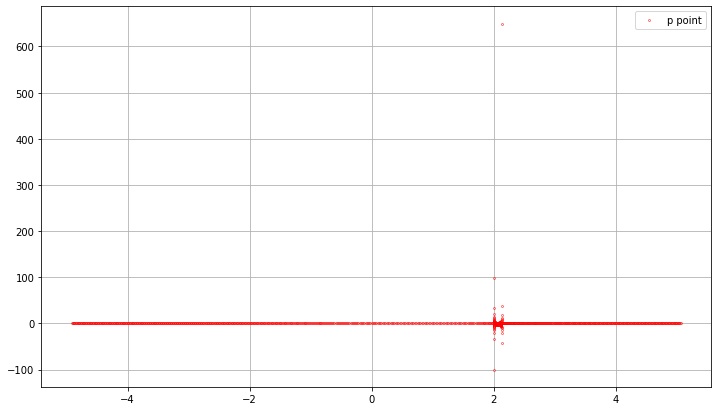

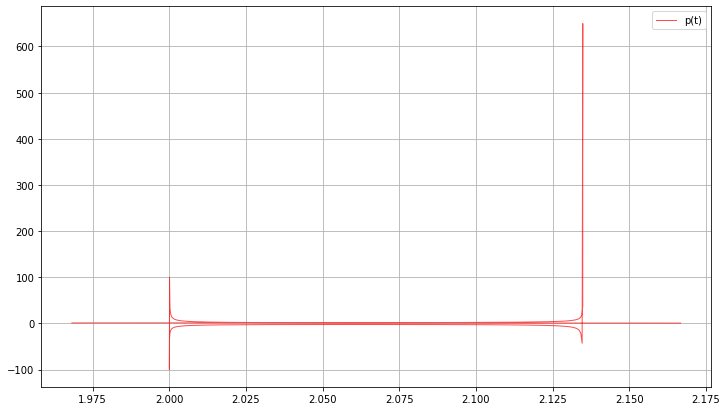

In [75]:
import numpy as np 
import matplotlib.pyplot as plt
import math
#разбиение отрезка x
def xfragmentation(xl, xr, step, x, n):
    for i in range(n):
        x[i] = xl + i*step
        
# начальное условие u(0, x)
def u_0(x):
    return 1/(1 + x**2)

# начальное условие p(0, x)
def p_0(x):
    return 1/(1 + x**2)

# опорные точки для u(0, x)
def u_0fragmentation(x, n, u0):
    for i in range(n):
        u0[i] = u_0(x[i])
        
# опорные точки для p(0, x)
def p_0fragmentation(x, n, p0):
    for i in range(n):
        p0[i] = p_0(x[i]) 
        
# коэффициенты линейных кусочков
def u_0eq(x, n, u0, u0k, u0b):
    for i in range(n-1):
        u0k[i] = (u0[i] - u0[i+1])/(x[i] - x[i+1])
        u0b[i] = u0[i+1] - u0k[i]*x[i+1]
# коэффициенты линейных кусочков       
def p_0eq(x, n, p0, p0k, p0b):
    for i in range(n-1):
        p0k[i] = (p0[i] - p0[i+1])/(x[i] - x[i+1])
        p0b[i] = p0[i+1] - p0k[i]*x[i+1]

#коэффициенты прямых через время t
'''def calcneq(n, u0k, u0b, p0k, p0b, unk, unb, pnk, pnb, t):
    for i in range(n-1):
        unk[i] = u0k[i]/(u0k[i]*t + 1)
        unb[i] = u0b[i]/(u0k[i]*t + 1)
        pnk[i] = p0k[i]/((u0k[i]*t + 1)**2)
        pnb[i] = 1/(u0k[i]*t + 1)*( p0k[i]*u0b[i]/( u0k[i]*(u0k[i]*t + 1) ) + p0b[i] - p0k[i]*u0b[i]/u0k[i] )'''
        
def calcneq(n, u0k, u0b, p0k, p0b, unk, unb, pnk, pnb, t):
    for i in range(n-1):
        if (math.fabs(u0k[i]) < 1e-4 and math.fabs(p0k[i]) > 1e-4):
            unk[i] = u0k[i]/(u0k[i]*t + 1)
            unb[i] = u0b[i]/(u0k[i]*t + 1)
            pnk[i] = p0k[i]
            pnb[i] = -p0k[i]*u0b[i]*t + p0b[i]
        elif (math.fabs(u0k[i]) > 1e-4 and math.fabs(p0k[i])<1e-4):
            unk[i] = u0k[i]/(u0k[i]*t + 1)
            unb[i] = u0b[i]/(u0k[i]*t + 1)
            pnk[i] = 0
            pnb[i] = p0b[i]/(u0k[i]*t + 1)
        elif (math.fabs(u0k[i]) < 1e-4 and math.fabs(p0k[i]) < 1e-4):
            unk[i] = u0k[i]/(u0k[i]*t + 1)
            unb[i] = u0b[i]/(u0k[i]*t + 1)
            pnk[i] = 0
            pnb[i] = p0b[i]
        else:
            unk[i] = u0k[i]/(u0k[i]*t + 1)
            unb[i] = u0b[i]/(u0k[i]*t + 1)
            pnk[i] = p0k[i]/((u0k[i]*t + 1)**2)
            pnb[i] = ( p0k[i]*u0b[i] + p0b[i]*u0k[i]*(u0k[i]*t + 1) - p0k[i]*u0b[i]*(u0k[i]*t + 1) )/ ( u0k[i]*((u0k[i]*t + 1)**2) )
            #pnb[i] = 1/(u0k[i]*t + 1)*( p0k[i]*u0b[i]/( u0k[i]*(u0k[i]*t + 1) ) + p0b[i] - p0k[i]*u0b[i]/u0k[i] )
            
        
# точки пересечения соседних прямых - опорные точки результирующего графика       
def intersections(n, unk, unb, xun, un, pnk, pnb, xpn, pn, xl, xr, step):
    for i in range(n-2):
        xun[i] = xl + i*step
        xpn[i] = xl + i*step
        
    const = True
    for i in range(n-1):
        if(math.fabs(u0k[i]) > 1e-3):
            const = False
    
    if(const == True):
        for i in range(n-2):
            if(i>0):
                xun[i] = xl + i*step
                un[i] = ((unk[i]*xun[i] + unb[i]) + (unk[i+1]*xun[i] + unb[i+1]))/2
    else:
        for i in range(n-2):
            xun[i] = (unb[i+1] - unb[i])/(unk[i] - unk[i+1])
            un[i] = unk[i]*(unb[i+1] - unb[i])/(unk[i] - unk[i+1]) + unb[i]
            
    const = True
    for i in range(n-1):
        if(math.fabs(p0k[i]) > 1e-3):
            const = False   
            
    if(const == True):
        for i in range(n-2):
            if(i>0):
                xpn[i] = xl + i*step
                pn[i] = ((pnk[i]*xpn[i] + pnb[i]) + (pnk[i+1]*xpn[i] + pnb[i+1]))/2
            else:
                pn[i] = pnk[i]*xpn[i] + pnb[i]
    else:
        for i in range(n-2):
            if(i>0):
                xpn[i] = (pnb[i+1] - pnb[i])/(pnk[i] - pnk[i+1])
                pn[i] = pnk[i]*(pnb[i+1] - pnb[i])/(pnk[i] - pnk[i+1]) + pnb[i]
            else:
                pn[i] = pnk[i]*xpn[i] + pnb[i]
            xpn[i] = xun[i]
            pn[i] = pnk[i]*xpn[i] + pnb[i]
            
            
                
            
    '''for i in range(n-2):
        if(math.fabs(pnk[i] - pnk[i+1]) < 1e-5):
            if(i>0):
                xpn[i] = xun[i-1] + step
                pn[i] = ((pnk[i]*xpn[i] + pnb[i]) + (pnk[i+1]*xpn[i] + pnb[i+1]))/2
                #print(i, pnb[i])
            else:
                pn[i] = pnk[i]*xpn[i] + pnb[i]
        else:
            if(i>0):
                xpn[i] = (pnb[i+1] - pnb[i])/(pnk[i] - pnk[i+1])
                pn[i] = pnk[i]*(pnb[i+1] - pnb[i])/(pnk[i] - pnk[i+1]) + pnb[i]'''
                
                
def right_inflection(n, xun):
    res = 0
    for i in range(5, n-5):
        if(((xun[i] - xun[i-1]) >= 1e-10) and ((xun[i+1] - xun[i]) <= -1e-10)):
            res = int(i)
    return res

def left_inflection(n, xun):
    res = 0
    for i in range(5, n-5):
        if(((xun[i] - xun[i-1]) <= 1e-10) and ((xun[i+1] - xun[i]) >= -1e-10)):
            res = int(i)
    return res

def int_with_line(n, xline, xun, xinters):
    ind = 0
    for i in range(3,n-3):
        if((xun[i] <= xline and xun[i+1] >= xline) or (xun[i] >= xline and xun[i+1] <= xline) ):
            xinters[ind] = int(i)
            ind += 1
            

# возвращает площадь справа от прямой
def right_area(n, xmid, xun, un):
    area = 0.0
    area1 = 0.0
    area2 = 0.0
    xinters = [int(0), int(0), int(0)]
    rinf = right_inflection(n, xun)
    int_with_line(n, xmid, xun, xinters)
    for i in range(xinters[0], rinf):
        area1 += math.fabs((un[i]+un[i+1])/2)*math.fabs(xun[i+1] - xun[i])
    for i in range(rinf, xinters[1]):
        area2 += math.fabs((un[i]+un[i+1])/2)*math.fabs(xun[i+1] - xun[i])
    area = math.fabs(area1-area2)
    return area

def left_area(n, xmid, xun, un):
    area = 0.0
    area1 = 0.0
    area2 = 0.0
    xinters = [int(0), int(0), int(0)]
    linf = left_inflection(n, xun)
    int_with_line(n, xmid, xun, xinters)
    for i in range(xinters[1], linf):
        area1 += math.fabs((un[i]+un[i+1])/2)*math.fabs(xun[i+1] - xun[i])
    for i in range(linf, xinters[2]):
        area2 += math.fabs((un[i]+un[i+1])/2)*math.fabs(xun[i+1] - xun[i])
    area = math.fabs(area1-area2)
    return area

# возвращает площадь слева от прямой
def bisection(n, xun, un):
    rinf = right_inflection(n, xun)
    linf = left_inflection(n, xun)
    xmid = (xun[rinf] + xun[linf])/2
    xprev = 0.0
    rs = right_area(n, xmid, xun, un)
    ls = left_area(n, xmid, xun, un)
    j = 0
    while(math.fabs(rs - ls) > 1e-2):
        if(rs - ls > 1e-2):
            xmid += 0.001
            rs = right_area(n, xmid, xun, un)
            ls = left_area(n, xmid, xun, un)
            #print(ls, rs)
        if(rs - ls < -1e-2):
            xmid -= 0.001
            rs = right_area(n, xmid, xun, un)
            ls = left_area(n, xmid, xun, un)
            #print(ls,rs)
        #print(rs - ls)
    return xmid
    
        
xl = float(input("enter xleft "))
xr = float(input("enter xright "))
step = float(input("enter step "))

n = int((xr - xl)/step) + 1

x = np.zeros(n, dtype=float)
u0 = np.zeros(n, dtype=float)
p0 = np.zeros(n, dtype=float)
xfragmentation(xl, xr, step, x, n)
u_0fragmentation(x, n, u0)
p_0fragmentation(x, n, p0)

plt.figure(figsize = (10,5))
plt.plot(x, u0, alpha=0.7, label="u_0", lw=1,  mew=0.5, ms=0.3, c = 'r')
plt.legend()
plt.grid(True)

plt.figure(figsize = (10,5))
plt.plot(x, p0, alpha=0.7, label="p_0", lw=1,  mew=0.5, ms=0.3, c = 'r')
plt.legend()
plt.grid(True)

u0k = np.zeros(n-1, dtype = float)
p0k = np.zeros(n-1, dtype = float)
u0b = np.zeros(n-1, dtype = float)
p0b = np.zeros(n-1, dtype = float)

u_0eq(x, n, u0, u0k, u0b)
p_0eq(x, n, p0, p0k, p0b)

t = float(input('enter calculation time '))

unk = np.zeros(n-1, dtype = float)
pnk = np.zeros(n-1, dtype = float)
unb = np.zeros(n-1, dtype = float)
pnb = np.zeros(n-1, dtype = float)

calcneq(n, u0k, u0b, p0k, p0b, unk, unb, pnk, pnb, t)


un = np.zeros(n-2, dtype = float)
xun = np.zeros(n-2, dtype = float)
pn = np.zeros(n-2, dtype = float)
xpn = np.zeros(n-2, dtype = float)

intersections(n, unk, unb, xun, un, pnk, pnb, xpn, pn, xl, xr, step)

mid = float(0)
mid = bisection(n, xun, un)
print('разрыв', mid)
print('left area: ', left_area(n, mid, xun, un), 'right area: ', right_area(n, mid, xun, un), )
iline = [0, 0, 0]
int_with_line(n, mid, xun, iline)
xline = [mid, mid, mid]
uline = [un[iline[0]], un[iline[1]], un[iline[2]]]

plt.figure(figsize = (12, 7))
plt.plot(xun, un, alpha=0.7, label="u(t)", lw=1,  mew=0.5, ms=0.3, c = 'r')
plt.plot(xline, uline, alpha=0.7, label="разрыв", lw=1,  mew=0.5, ms=0.3, c = 'b')
plt.legend()
plt.grid(True)

m=0
for i in range(n-3):
    if(math.fabs(xpn[i] - mid) < 0.1):
        #pn[i] = 0
        m += 1
        #print(i, xun[i], un[i], xpn[i], pn[i])
            
x1 = np.zeros(m, dtype = float)
y1 = np.zeros(m, dtype = float)
j = 0
for i in range(n-3):
    if(math.fabs(xpn[i] - mid) < 0.1):
        x1[j] = xpn[i]
        y1[j] = pn[i]
        j += 1

#for i in range(n-3):
 #   print('xun[i] = ', xun[i], 'xpn[i] = ', xpn[i], 'ai =', unk[i], 'pnk_i = ', pnk[i])
        
plt.figure(figsize = (12, 7))
plt.plot(xpn, pn, alpha=0.7, label="p(t)", lw=1,  mew=0.5, ms=0.3, c = 'r')
plt.legend()
plt.grid(True)

plt.figure(figsize=(12, 7))
plt.plot(xpn, pn, '.', alpha=1, label="p point", lw=1, mec='r', mew=2, ms=1, c = 'w')
plt.legend()
plt.grid(True)

if(math.fabs(left_area(n, mid, xun, un)) > 1e-5):
    plt.figure(figsize = (12, 7))
    plt.plot(x1, y1, alpha=0.7, label="p(t)", lw=1,  mew=0.5, ms=0.3, c = 'r')
    plt.legend()
    plt.grid(True)
 


##### 

# 